# SI figure 6

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gspec #import GridSpec
from matplotlib.gridspec import GridSpec

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use('default')

import dill as pickle
pickle.settings['recurse'] = True

# Import functions
%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [3]:
def data_dict_from_pkl(DataName):
    FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [4]:
repump_sweep_data = data_dict_from_pkl('SI_fig6_repump_decays.pkl')
repump_fitparams = data_dict_from_pkl('SI_fig6_repump_fitparams.pkl') 
SSRO_dict =  data_dict_from_pkl('SI_fig6_SSRO.pkl')

# Generate the plot from the data

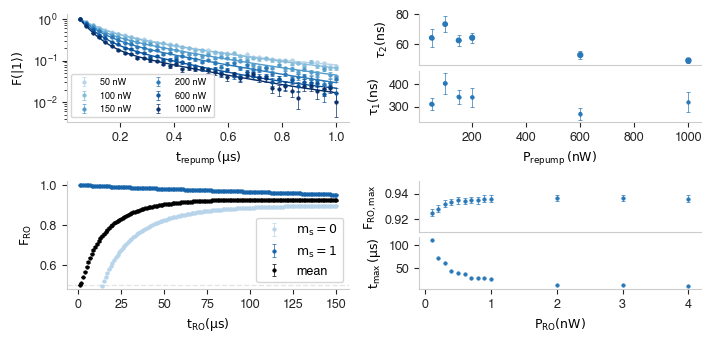

In [5]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier])#,constrained_layout=True)

gs = GridSpec(2, 2, figure=fig)#, hspace = 2)#, hspace = 1, wspace = 0.1)
ax0 = fig.add_subplot(gs[0,0])
# ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
# ax3 = fig.add_subplot(gs[1,1])


gs1 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = gs[0,1], hspace = 0.1)
ax1a = fig.add_subplot(gs1[1,0])
ax1b = fig.add_subplot(gs1[0,0], sharex = ax1a)

gs3 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = gs[1,1], hspace = 0.1)
ax3a = fig.add_subplot(gs3[1,0])
ax3b = fig.add_subplot(gs3[0,0], sharex = ax3a)



'''

PLOTTING OF FIGURE SI 5a

'''

power_keys_list = list(repump_sweep_data.keys())
N_powers = len(power_keys_list)
color_list = cm.Blues(np.linspace(0.3,1,N_powers))
color_single = color_list[ int(len(color_list)/2) ]

for cntr, power in enumerate(power_keys_list):
    t = repump_sweep_data[power]['t']
    F = repump_sweep_data[power]['F']
    Ferr = repump_sweep_data[power]['Ferr']
    t_fit = repump_sweep_data[power]['t_fit']
    F_fit = repump_sweep_data[power]['F_fit']

    label = str(power) + ' nW'

    color = color_list[cntr]
    ax0.errorbar(t, F, Ferr, linestyle = 'none', marker = 'o', label = label, color = color, \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
    ax0.plot(t_fit, F_fit, color = color, linewidth = linewidth_default*fig_multiplier)

ax0.set_yscale('log')
ax0.legend(ncol = 2, fontsize = 6.5)
ax0.set_xlabel(r'$\mathrm{t_{repump} \, (\mu s)}$')
ax0.set_ylabel(r'$\mathrm{F(|1\rangle)}$')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)


'''

PLOTTING OF FIGURE SI 5b

'''

repump_power_list = repump_fitparams['repump_power_list']
tau1_array = repump_fitparams['tau1_array']
tau1_err_array = repump_fitparams['tau1_err_array']
amplitude1_array = repump_fitparams['amplitude1_array']
amplitude1_err_array = repump_fitparams['amplitude1_err_array']
tau2_array = repump_fitparams['tau2_array']
tau2_err_array = repump_fitparams['tau2_err_array']
amplitude2_array = repump_fitparams['amplitude2_array']
amplitude2_err_array = repump_fitparams['amplitude2_err_array']
offset_array = repump_fitparams['offset_array']
offset_err_array = repump_fitparams['offset_err_array']

amp1_fraction = amplitude1_array/(amplitude1_array+amplitude2_array)
amp1_size = amp1_fraction*15
ax1a.errorbar(repump_power_list, tau1_array*1e3, yerr=tau1_err_array*1e3, linestyle = 'none', marker = 'o', label = label, color = color_single, \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax1a.scatter(repump_power_list, tau1_array*1e3, s = amp1_size, marker = 'o', color = color_single)
ax1a.set_xlabel(r'$\mathrm{P_{repump} \, (nW)}$')
ax1a.set_ylabel(r'$\mathrm{\tau_1 \mathrm{(ns)}}$')
ax1a.spines['right'].set_visible(False)
ax1a.spines['top'].set_visible(False)

# ax_2b = ax_2.twinx()
amp2_size = (1-amp1_fraction)*15
ax1b.errorbar(repump_power_list, tau2_array*1e3, yerr=tau2_err_array*1e3, linestyle = 'none', marker = 'o', label = label, color = color_single, \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax1b.scatter(repump_power_list, tau2_array*1e3, s = amp2_size, marker = 'o', color = color_single)
ax1b.set_ylabel(r'$\tau_2 \mathrm{(ns)}$')
ax1b.spines['right'].set_visible(False)
ax1b.spines['top'].set_visible(False)
plt.setp( ax1b.get_xticklabels(), visible=False)
ax1b.tick_params(bottom=False)



'''

PLOTTING OF FIGURE SI 5c

'''

time_arr = SSRO_dict['time_arr']
fid0_arr = SSRO_dict['fid0_arr']
fid0err_arr = SSRO_dict['fid0err_arr']
fid1_arr = SSRO_dict['fid1_arr']
fid1err_arr = SSRO_dict['fid1err_arr']
F_arr = SSRO_dict['F_arr']
Ferr_arr = SSRO_dict['Ferr_arr']

SSRO_color = cm.Blues(np.linspace(0.3,0.8,2))
ax2.errorbar(time_arr, fid0_arr, fid0err_arr,  linestyle = 'none', marker = 'o', label = r'$\mathrm{m_s = 0}$', color = SSRO_color[0], \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax2.errorbar(time_arr, fid1_arr, fid1err_arr,  linestyle = 'none', marker = 'o', label = r'$\mathrm{m_s = 1}$', color = SSRO_color[1], \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax2.errorbar(time_arr, F_arr, Ferr_arr,  linestyle = 'none', marker = 'o', label = 'mean', color = 'k', \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)

ax2.set_xlabel(r'$\mathrm{t_{RO} \mathrm{(\mu s)}}$')
ax2.set_ylabel(r'$\mathrm{F_{RO}}$')
ax2.legend()
ax2.axhline(y = 0.5, linestyle = '--', color = 'k', alpha = 0.1)
ax2.set_ylim([0.48,1.02])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



'''

PLOTTING OF FIGURE SI 5d

'''

RO_power_list = SSRO_dict['RO_power_list']
t_max_arr = SSRO_dict['t_max_arr']
F_max_arr = SSRO_dict['F_max_arr']
F_max_err_arr = SSRO_dict['F_max_err_arr']

ax3a.plot(RO_power_list, t_max_arr, linestyle = 'none', marker = 'o',  markersize = markersize_default*fig_multiplier, color = color_single, linewidth = linewidth_default*fig_multiplier)
ax3a.set_xlabel(r'$\mathrm{P_{RO} (nW)}$')
ax3a.set_ylabel(r'$\mathrm{t_{max} \, (\mu s)}$')
ax3a.spines['right'].set_visible(False)
ax3a.spines['top'].set_visible(False)

ax3b.errorbar(RO_power_list, F_max_arr, F_max_err_arr, linestyle = 'none', marker = 'o', label = 'mean', color = color_single, \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax3b.set_ylabel(r'$\mathrm{F_{RO,max}}$')
ax3b.set_ylim([0.91,0.95])
ax3b.spines['right'].set_visible(False)
ax3b.spines['top'].set_visible(False)
plt.setp( ax3b.get_xticklabels(), visible=False)
ax3b.tick_params(bottom=False)



plt.tight_layout()



# FolderPath = r'...' 
# FigName = 'SI_Fig6.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)